In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import umap

C:\Users\Niklas\miniconda3\envs\cuda_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("../track-a.csv")
data.head()
data.tail()
data.describe()

,anger,fear,joy,sadness,surprise
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.120303,0.582009,0.243497,0.317197,0.303107
std,0.325375,0.493318,0.429270,0.465469,0.459684
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#look at stuff
#find null values
data.isna().sum()
data.columns

Index(['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise'], dtype='object')

Anger count:
 333
Fear count:
 1611
Joy count:
 674
Sadness count:
 878
Surprise count:
 839


<BarContainer object of 5 artists>

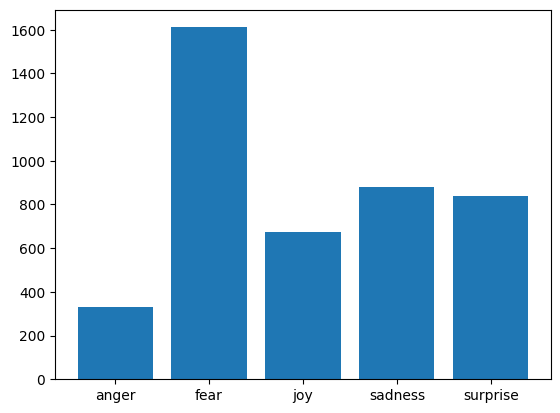

In [4]:

anger_count = data['anger'].sum()
fear_count = data['fear'].sum()
joy_count = data['joy'].sum()
sadness_count = data['sadness'].sum()
surprise_count = data['surprise'].sum()

print("Anger count:\n", anger_count)
print("Fear count:\n", fear_count)
print("Joy count:\n", joy_count)
print("Sadness count:\n", sadness_count)
print("Surprise count:\n", surprise_count)

#plot the counts    
plt.bar(['anger', 'fear', 'joy', 'sadness', 'surprise'], 
        [anger_count, fear_count, joy_count, sadness_count, surprise_count])



Fear is most common, followed by  sadness and surprise.

In [5]:
#different combinations of emotions
data.groupby(['anger', 'fear', 'joy', 'sadness', 'surprise']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,anger,fear,joy,sadness,surprise,counts
4,0,0,1,0,0,429
10,0,1,0,1,0,412
8,0,1,0,0,0,411
9,0,1,0,0,1,324
0,0,0,0,0,0,239
2,0,0,0,1,0,133
11,0,1,0,1,1,124
1,0,0,0,0,1,114
5,0,0,1,0,1,108
24,1,1,0,1,0,77


In [ ]:
#most common is only joy, followed by fear and surprise

In [6]:
# load predictions
predictions_train = pd.read_csv("../predictions_train.csv")
predictions_train.describe()

,predicted_anger,predicted_fear,predicted_joy,predicted_sadness,predicted_surprise
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.111994,0.588873,0.247471,0.312861,0.288295
std,0.315416,0.492127,0.431621,0.463742,0.453051
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Anger count:
 310
Fear count:
 1630
Joy count:
 685
Sadness count:
 866
Surprise count:
 798


<BarContainer object of 5 artists>

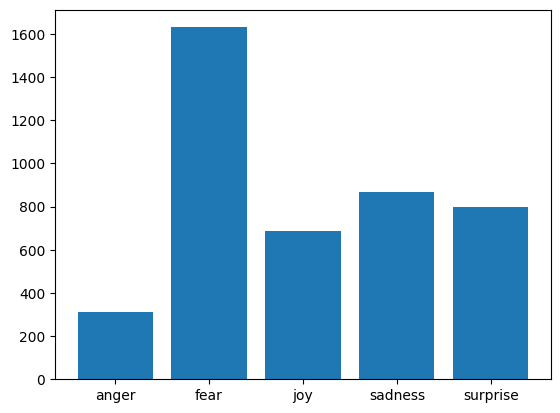

In [7]:
anger_count = predictions_train['predicted_anger'].sum()
fear_count = predictions_train['predicted_fear'].sum()
joy_count = predictions_train['predicted_joy'].sum()
sadness_count = predictions_train['predicted_sadness'].sum()
surprise_count = predictions_train['predicted_surprise'].sum()

print("Anger count:\n", anger_count)
print("Fear count:\n", fear_count)
print("Joy count:\n", joy_count)
print("Sadness count:\n", sadness_count)
print("Surprise count:\n", surprise_count)

#plot the counts    
plt.bar(['anger', 'fear', 'joy', 'sadness', 'surprise'], 
        [anger_count, fear_count, joy_count, sadness_count, surprise_count])

similar distribution of emootions
because of training or is it just normal?

Distribution sieht ähnlich aus
die imbalance ist genauso wie im training

In [8]:
predictions_train.groupby(['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,predicted_anger,predicted_fear,predicted_joy,predicted_sadness,predicted_surprise,counts
8,0,1,0,0,0,445
4,0,0,1,0,0,438
10,0,1,0,1,0,435
9,0,1,0,0,1,306
0,0,0,0,0,0,236
2,0,0,0,1,0,121
1,0,0,0,0,1,115
11,0,1,0,1,1,113
5,0,0,1,0,1,103
24,1,1,0,1,0,66


less combinations of emotions, most common is only fear, then fear with sadness
2nd line same as in training data
co-occurrence of emotions is slightly different, but not too much

In [9]:
# look at Accuracy and Precision
from sklearn.metrics import accuracy_score, precision_score

accuracy_anger = accuracy_score(data['anger'], predictions_train['predicted_anger'])
accuracy_fear = accuracy_score(data['fear'], predictions_train['predicted_fear']) 
accuracy_joy = accuracy_score(data['joy'], predictions_train['predicted_joy'])
accuracy_sadness = accuracy_score(data['sadness'], predictions_train['predicted_sadness'])
accuracy_surprise = accuracy_score(data['surprise'], predictions_train['predicted_surprise'])

precision_anger = precision_score(data['anger'], predictions_train['predicted_anger'])
precision_fear = precision_score(data['fear'], predictions_train['predicted_fear'])
precision_joy = precision_score(data['joy'], predictions_train['predicted_joy'])
precision_sadness = precision_score(data['sadness'], predictions_train['predicted_sadness'])
precision_surprise = precision_score(data['surprise'], predictions_train['predicted_surprise'])

print("Accuracy scores:")
print("Anger accuracy:", accuracy_anger)
print("Fear accuracy:", accuracy_fear)
print("Joy accuracy:", accuracy_joy)
print("Sadness accuracy:", accuracy_sadness)
print("Surprise accuracy:", accuracy_surprise)
print("\nPrecision scores:")
print("Anger precision:", precision_anger)
print("Fear precision:", precision_fear)
print("Joy precision:", precision_joy)
print("Sadness precision:", precision_sadness)
print("Surprise precision:", precision_surprise)

# Macro accuracy and precision
accuracy_macro = accuracy_score(data[['anger', 'fear', 'joy', 'sadness', 'surprise']], 
                                 predictions_train[['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']])
precision_macro = precision_score(data[['anger', 'fear', 'joy', 'sadness', 'surprise']], 
                                   predictions_train[['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']], 
                                   average='macro')
print("\nMacro accuracy:", accuracy_macro)
print("Macro precision:", precision_macro)

Accuracy scores:
Anger accuracy: 0.9808526011560693
Fear accuracy: 0.9526734104046243
Joy accuracy: 0.9692919075144508
Sadness accuracy: 0.963150289017341
Surprise accuracy: 0.9642341040462428

Precision scores:
Anger precision: 0.9516129032258065
Fear precision: 0.9539877300613497
Joy precision: 0.92992700729927
Sadness precision: 0.9480369515011547
Surprise precision: 0.9636591478696742

Macro accuracy: 0.8833092485549133
Macro precision: 0.9494447479914511


In [10]:
#calc F1 and macro F1 score
from sklearn.metrics import f1_score
# F1 scores for each emotion
f1_anger = f1_score(data['anger'], predictions_train['predicted_anger'])      
f1_fear = f1_score(data['fear'], predictions_train['predicted_fear'])
f1_joy = f1_score(data['joy'], predictions_train['predicted_joy'])
f1_sadness = f1_score(data['sadness'], predictions_train['predicted_sadness'])
f1_surprise = f1_score(data['surprise'], predictions_train['predicted_surprise'])
# macro F1 score
f1_macro = f1_score(data[['anger', 'fear', 'joy', 'sadness', 'surprise']], 
                    predictions_train[['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']], 
                    average='macro')
print("F1 scores:")
print("Anger F1 score:", f1_anger)
print("Fear F1 score:", f1_fear)
print("Joy F1 score:", f1_joy)
print("Sadness F1 score:", f1_sadness)
print("Surprise F1 score:", f1_surprise)
print("Macro F1 score:", f1_macro)


F1 scores:
Anger F1 score: 0.9175738724727839
Fear F1 score: 0.9595803764270286
Joy F1 score: 0.9374540103016924
Sadness F1 score: 0.9415137614678899
Surprise F1 score: 0.9395235186316433
Macro F1 score: 0.9391291078602076


Also check Performance Discrepancy

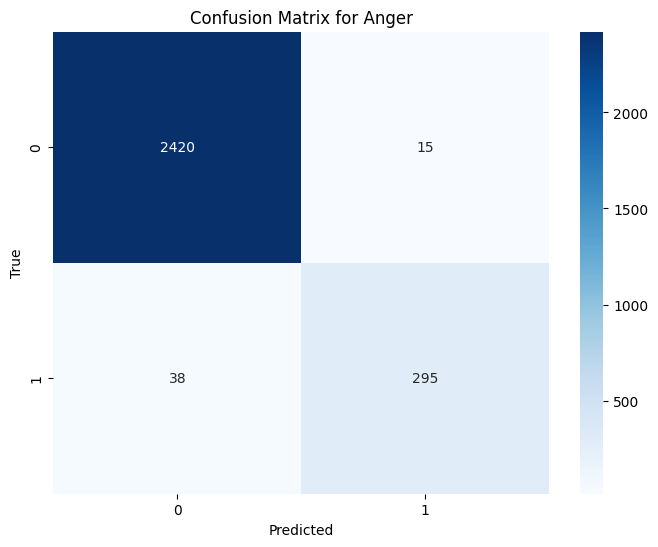

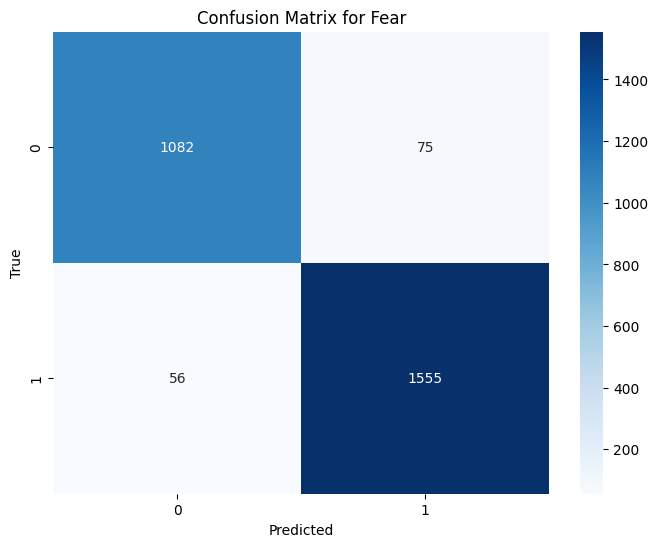

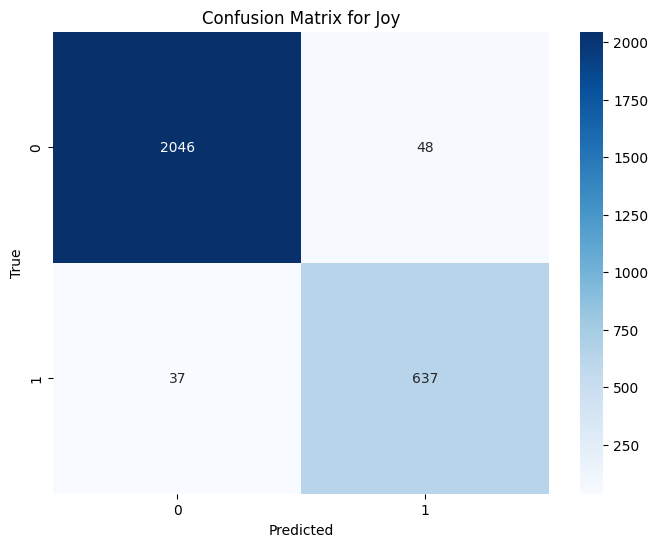

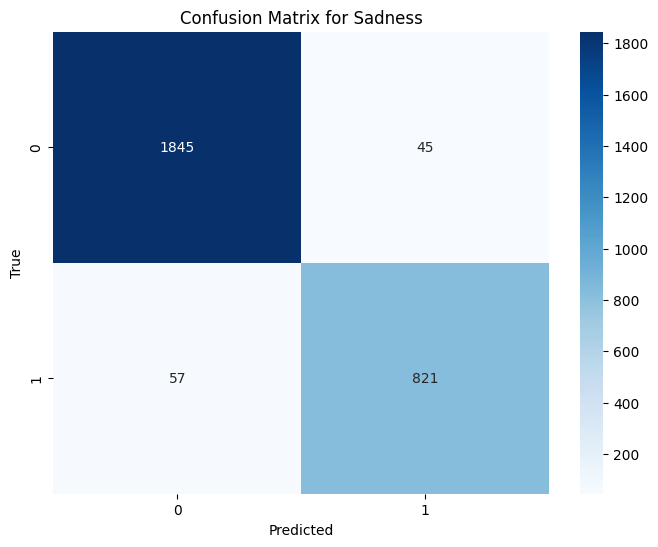

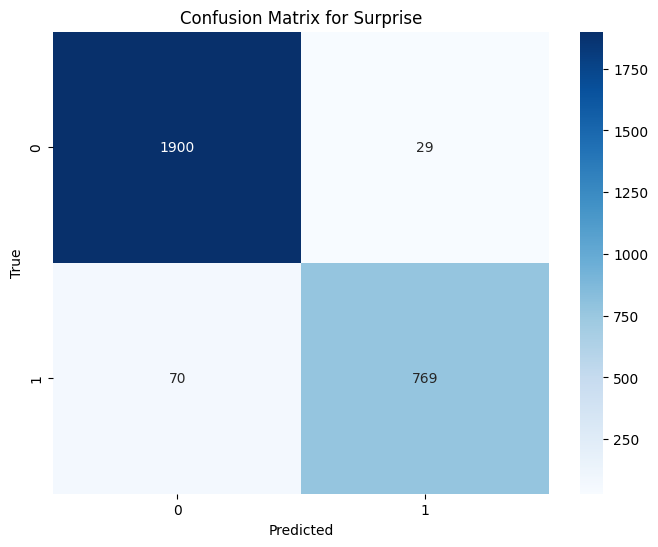

In [12]:
# Error Analysis
# confusion matrix per emotion
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {emotion}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 
    
plot_confusion_matrix(data['anger'], predictions_train['predicted_anger'], 'Anger')
plot_confusion_matrix(data['fear'], predictions_train['predicted_fear'], 'Fear')  
plot_confusion_matrix(data['joy'], predictions_train['predicted_joy'], 'Joy')
plot_confusion_matrix(data['sadness'], predictions_train['predicted_sadness'], 'Sadness')
plot_confusion_matrix(data['surprise'], predictions_train['predicted_surprise'], 'Surprise')



In [13]:
#predictions test
predictions_test = pd.read_csv("../predictions_test.csv")
predictions_test.describe()

,predicted_anger,predicted_fear,predicted_joy,predicted_sadness,predicted_surprise
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,0.080593,0.614384,0.249729,0.290206,0.239610
std,0.272258,0.486829,0.432934,0.453939,0.426922
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Anger count:
 223
Fear count:
 1700
Joy count:
 691
Sadness count:
 803
Surprise count:
 663


<BarContainer object of 5 artists>

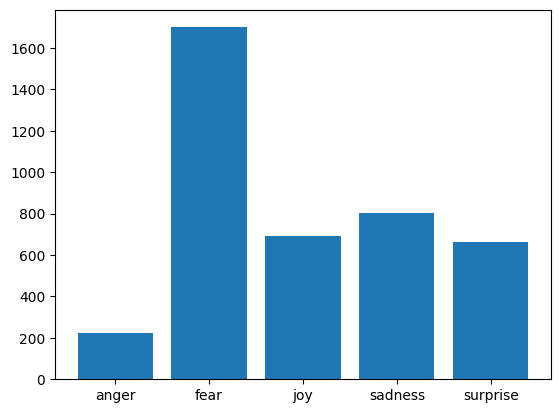

In [14]:
anger_count = predictions_test['predicted_anger'].sum()
fear_count = predictions_test['predicted_fear'].sum()
joy_count = predictions_test['predicted_joy'].sum()
sadness_count = predictions_test['predicted_sadness'].sum()
surprise_count = predictions_test['predicted_surprise'].sum()

print("Anger count:\n", anger_count)
print("Fear count:\n", fear_count)
print("Joy count:\n", joy_count)
print("Sadness count:\n", sadness_count)
print("Surprise count:\n", surprise_count)

#plot the counts    
plt.bar(['anger', 'fear', 'joy', 'sadness', 'surprise'], 
        [anger_count, fear_count, joy_count, sadness_count, surprise_count])

In [15]:
predictions_train.groupby(['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,predicted_anger,predicted_fear,predicted_joy,predicted_sadness,predicted_surprise,counts
8,0,1,0,0,0,445
4,0,0,1,0,0,438
10,0,1,0,1,0,435
9,0,1,0,0,1,306
0,0,0,0,0,0,236
2,0,0,0,1,0,121
1,0,0,0,0,1,115
11,0,1,0,1,1,113
5,0,0,1,0,1,103
24,1,1,0,1,0,66


C:\Users\Niklas\miniconda3\envs\cuda_venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


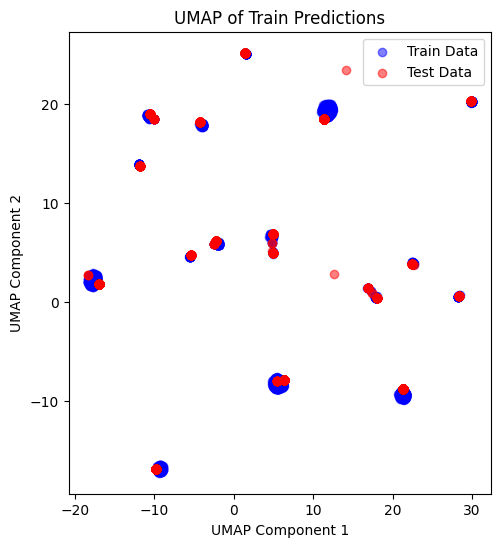

In [17]:
# UMAP comparison of train and test data
import umap
# Create UMAP embeddings for train and test predictions
umap_model = umap.UMAP(random_state=42)

train_embeddings = umap_model.fit_transform(predictions_train[['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']])
test_embeddings = umap_model.transform(predictions_test[['predicted_anger', 'predicted_fear', 'predicted_joy', 'predicted_sadness', 'predicted_surprise']])
# Plot UMAP embeddings for train data   
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_embeddings[:, 0], train_embeddings[:, 1], c='blue', alpha=0.5, label='Train Data')
plt.scatter(test_embeddings[:, 0], test_embeddings[:, 1], c='red', alpha=0.5, label='Test Data')
plt.title('UMAP of Train Predictions')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
    

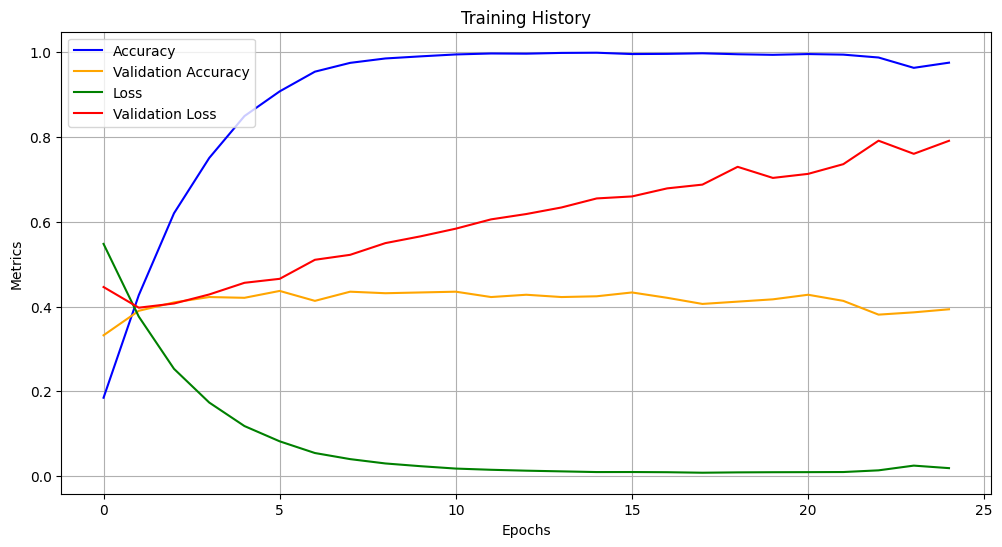

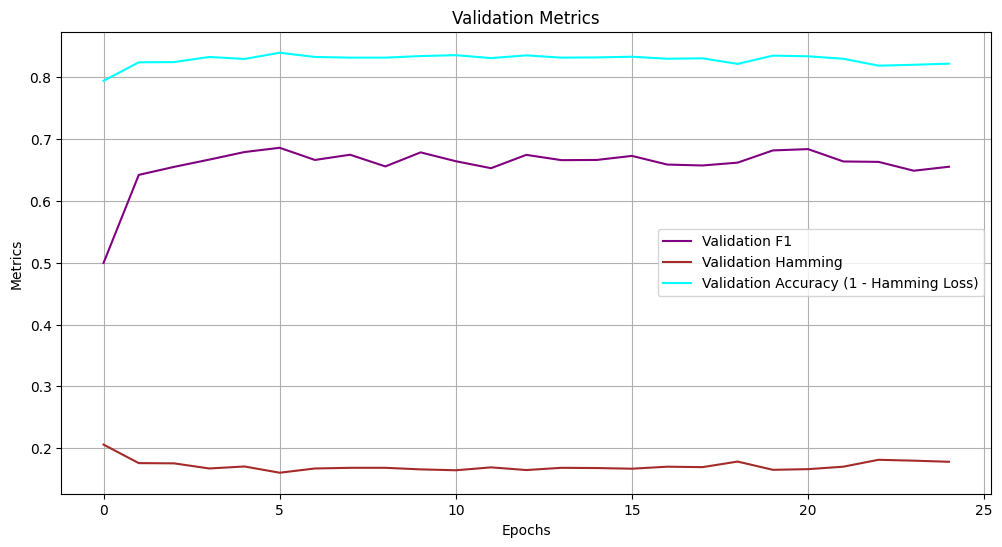

In [22]:
# get data from model history
history = pd.read_csv("../training_history.csv")

# plot all metrics against epochs in one plot
plt.figure(figsize=(12, 6))
plt.plot(history['train_acc'], label='Accuracy', color='blue')
plt.plot(history['val_acc'], label='Validation Accuracy', color='orange')
plt.plot(history['train_loss'], label='Loss', color='green')
plt.plot(history['val_loss'], label='Validation Loss', color='red')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history['val_f1'], label='Validation F1', color='purple')
plt.plot(history['val_hamming'], label='Validation Hamming', color='brown')
plt.plot(1-history['val_hamming'], label='Validation Accuracy (1 - Hamming Loss)', color='cyan')
plt.title('Validation Metrics')
plt.xlabel('Epochs')    
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()
